# Exploring the bonds in the system

We consider two patches to be bonded if there is distance <= 2r (0.24) between them

Exploring the number of bondd, their distances and their lifetime. We use custom scripts from the file progs.analysis for that

In [1]:
import gsd.hoomd
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
import progs.analysis as analysis
import numpy as np
import pickle
from scipy import stats
from scipy.stats import kstest, chisquare
from scipy.optimize import curve_fit
import matplotlib as mpl
from scipy.stats import chisquare
from decimal import Decimal, getcontext
import matplotlib.colors as mcolors
import math
getcontext().prec = 50

## Preprocessing

Calculating the number of bonds in each frame (pairs) and presence intervals for each bond (lifetimes)

In [3]:
# get number of bonds and presence intervals for each bond
def get_pairs(file, period=1, max_len=1000, calc_lifetimes=True):
    traj = gsd.hoomd.open(file)
    bonds = analysis.Bonds_in_time(traj[:max_len:period], r_bond=0.24)
    pairs = bonds.count_patches_neighbors()
    if calc_lifetimes:
        lifetimes = bonds.calculate_bond_lifetimes()
    else:
        lifetimes = []
    return pairs, lifetimes

In [4]:
# the function to extract lifetimes distr from the intervals of bonds presents
# returns the number of occurences of each lifetime in the dataset
def extract_lifetimes_distr(data, bin_size = 10**5):
    # Find the minimum and maximum time from all the values in the data
    min_time = np.min([k for i in data.values() for j in i for k in j])
    max_time = np.max([k for i in data.values() for j in i for k in j])
    # Calculate the lengths by subtracting the start time (i[0]) from the end time (i[1])
    # Exclude the intervals that start with min_time or end with max_time
    lengths = [int(i[1])-int(i[0]) for v in data.values() for i in v if (i[0]!=min_time and i[1]!=max_time)]
    # Replace lengths of 0 with the bin_size
    lengths = np.array([bin_size if x==0 else x for x in lengths])
    values, counts = np.unique(lengths, return_counts=True)
    return {v:c for v,c in zip(values, counts)}

In [137]:
# get number of bonds and presence intervals for each bond
pairs = {}
intervals = {}
for i in range(5):
    pairs[0.06 + i*0.002], intervals[0.06 + i*0.002] = get_pairs('/share/scratch1/alena.taskina01/md/hoomd4/3patches/angles/k1000/' + str(0.06+i*0.002) + '/msd_8_5.gsd', period=1, max_len=3000, calc_lifetimes=True)
    print(i)
pairs[0.07], intervals[0.07] = get_pairs('/share/scratch1/alena.taskina01/md/hoomd4/3patches/angles/k1000/' + str(0.07) + '/msd_8_5.gsd', period=1, max_len=3000, calc_lifetimes=True)

0
1
2
3
4


In [151]:
# save the data
with open('/share/scratch1/alena.taskina01/md/hoomd4/3patches/angles/k1000/lifetimes_8_5.pkl', 'wb') as file:

    pickle.dump(intervals, file)

In [2]:
# load the data of presence intervals
# Define the file paths
file_paths = [
    '/share/scratch1/alena.taskina01/md/hoomd4/3patches/rigid/lifetimes_8_5.pkl',
    '/share/scratch1/alena.taskina01/md/hoomd4/3patches/angles/k1/lifetimes_8_5.pkl',
    '/share/scratch1/alena.taskina01/md/hoomd4/3patches/angles/k2/lifetimes_8_5.pkl',
    '/share/scratch1/alena.taskina01/md/hoomd4/3patches/angles/k10/lifetimes_8_5.pkl',
    '/share/scratch1/alena.taskina01/md/hoomd4/3patches/angles/k100/lifetimes_8_5.pkl',
    '/share/scratch1/alena.taskina01/md/hoomd4/3patches/angles/k1000/lifetimes_8_5.pkl'
]

# Define the variable names
variables = ['lifetimes', 'lifetimes_k1', 'lifetimes_k2', 'lifetimes_k10', 'lifetimes_k100', 'lifetimes_k1000']

# Use a loop to open and load the files
for file_path, variable in zip(file_paths, variables):
    with open(file_path, 'rb') as file:
        globals()[variable] = pickle.load(file)

In [11]:
# calculate lifetimes distributions and save them
file_paths_save = [
    '/share/scratch1/alena.taskina01/md/hoomd4/3patches/rigid/lifetimes_distr.pkl',
    '/share/scratch1/alena.taskina01/md/hoomd4/3patches/angles/k1/lifetimes_distr.pkl',
    '/share/scratch1/alena.taskina01/md/hoomd4/3patches/angles/k2/lifetimes_distr.pkl',
    '/share/scratch1/alena.taskina01/md/hoomd4/3patches/angles/k10/lifetimes_distr.pkl',
    '/share/scratch1/alena.taskina01/md/hoomd4/3patches/angles/k100/lifetimes_distr.pkl',
    '/share/scratch1/alena.taskina01/md/hoomd4/3patches/angles/k1000/lifetimes_distr.pkl'
]

for file_path, variable in zip(file_paths_save, variables):
    distr = {}
    data = globals()[variable]
    for key in data.keys():
        distr[key] = extract_lifetimes_distr(data[key])
    with open(file_path, 'wb') as file:
        pickle.dump(distr, file)
    print(variable)

lifetimes
lifetimes_k1
lifetimes_k2
lifetimes_k10
lifetimes_k100
lifetimes_k1000


# Number of bonds

In [4]:
# open files
file_paths = [
    '/share/scratch1/alena.taskina01/md/hoomd4/3patches/rigid/pairs_8_5.pkl',
    '/share/scratch1/alena.taskina01/md/hoomd4/3patches/angles/k1/pairs_8_5.pkl',
    '/share/scratch1/alena.taskina01/md/hoomd4/3patches/angles/k2/pairs_8_5.pkl',
    '/share/scratch1/alena.taskina01/md/hoomd4/3patches/angles/k10/pairs_8_5.pkl',
    '/share/scratch1/alena.taskina01/md/hoomd4/3patches/angles/k100/pairs_8_5.pkl',
    '/share/scratch1/alena.taskina01/md/hoomd4/3patches/angles/k1000/pairs_8_5.pkl'
]

variables = ['pairs', 'pairs_k1', 'pairs_k2', 'pairs_k10', 'pairs_k100', 'pairs_k1000']

for file_path, variable in zip(file_paths, variables):
    with open(file_path, 'rb') as file:
        globals()[variable] = pickle.load(file)


First, let's see what is the number of bonds for specific system at specific temperature after equilibration (histogram of numbers in different timeframes)
We calculate the fraction pof bonds $p_b$, assuming that the maximum number of bonds is $\frac{1}{2} 3N  $ (half of the number of patches)

0.020412911929920785 0.7909439176635693


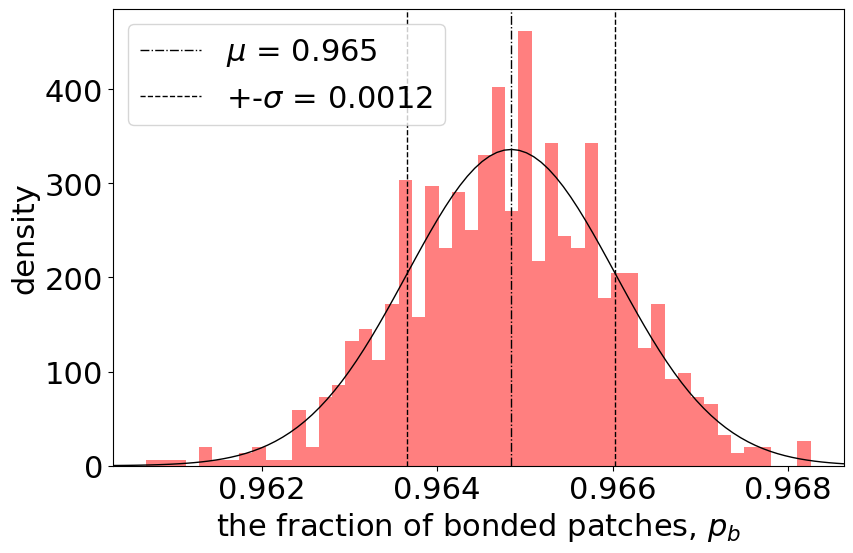

In [5]:
mpl.rcParams['font.size'] = 22

data = pairs[0.06][1][:1000]/(10648*3)

fig, ax = plt.subplots(1, 1, figsize=(9, 6), sharex=True)
ax.set_xlabel(r'the fraction of bonded patches, $p_b$')
ax.set_ylabel('density')

# Plot histogram
ax.hist(data, bins=50, density=True, alpha=0.5, color='r')

# Plot the fitted normal distribution
mu, std = stats.norm.fit(data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
ax.plot(x, p, 'k', linewidth=1)
   
# Add vertical lines for mean and +/- 1 standard deviations
ax.axvline(mu, color='k', linestyle='-.', linewidth=1, label=f'$\mu$ = {np.round(mu, 3)}')
ax.axvline(mu + std, color='k', linestyle='dashed', linewidth=1, label=f'+-$\sigma$ = {np.round(std, 4)}' )
ax.axvline(mu - std, color='k', linestyle='dashed', linewidth=1)
    
# Kolmogorov-Smirnov test
ks_statistic, ks_p_value = kstest(data, 'norm', args=(mu, std))
print(ks_statistic, ks_p_value)

ax.set_xlim((xmin, xmax))
plt.legend()
plt.tight_layout()
plt.show()

The number of bonds over different timeframes adheres to normal distribution. So we can use standart deviation as an error, when we compare different temperatures or systems

Let's see how the number of bonds changes with temperature

Slope: -0.5518139919495113, Intercept: 5.85948162808436
Correlation Coefficient: -0.9996936703398347
P-value: 1.4074241838549834e-07 (Statistical significance)
Standard Error: 0.006830807253144984


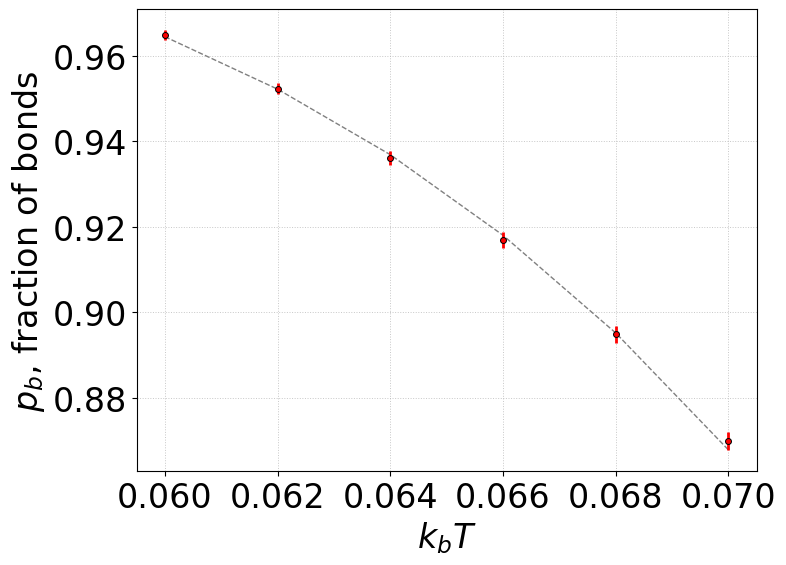

In [7]:
# create a figure
mpl.rcParams['font.size'] = 24
f, ax = plt.subplots(figsize=(8, 6))
plt.xlabel(r'$k_bT$')
plt.ylabel(r'$p_b$, fraction of bonds')
ax.grid(True, which='both', linestyle=':', linewidth=0.7, alpha=0.7)

# extract data
N = 10648
kTs = [np.round(0.06+i*0.002,3) for i in range(6)]
x = np.array(kTs)
y = np.array([np.mean(pairs[kT][1]/(N*3)) for kT in kTs[:]])
error = np.array([np.std(pairs[kT][1]/(N*3)) for kT in kTs[:]])

# fit the data
slope, intercept, r_value, p_value, std_err = stats.linregress(1/x, np.log(1-y))
plt.plot(x, -np.exp(slope*(1/x)+intercept)+1, linestyle='--', color='grey', linewidth=1)

# Print the statistical significance of the fit
print(f"Slope: {slope}, Intercept: {intercept}")
print(f"Correlation Coefficient: {r_value}")
print(f"P-value: {p_value} (Statistical significance)")
print(f"Standard Error: {std_err}")

# plot the data
ax.errorbar(x, y, yerr=error, fmt='.', label=r'$k_\theta=inf$', markersize=5, elinewidth=2, color='r')
plt.plot(x, y, 'o', markersize=4, color='k')


Slope: -0.542391246223439, Intercept: 5.709679732953735
Correlation Coefficient: -0.9994841386719986
P-value: 1.160556370725633e-08 (Statistical significance)
Standard Error: 0.007794302029158326


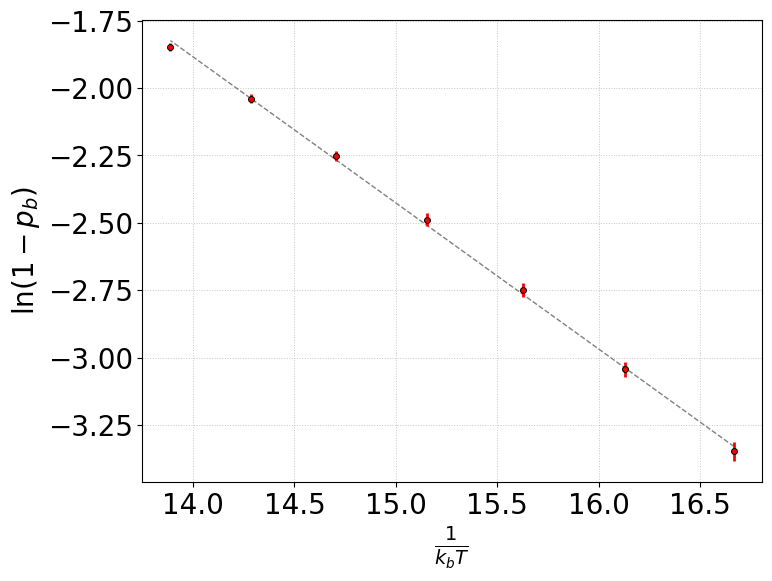

In [8]:
#create a figure
mpl.rcParams['font.size'] = 20
f, ax = plt.subplots(figsize=(8, 6))
plt.xlabel(r'$\frac{1}{k_bT}$')
plt.ylabel(r'$\ln(1-p_b)$')
ax.grid(True, which='both', linestyle=':', linewidth=0.7, alpha=0.7)

# Calculate the data
N = 10648
kTs = [np.round(0.06+i*0.002,3) for i in range(7)]
x = 1/np.array(kTs)
y = np.array([np.mean(np.log(1-(pairs[kT][1]/(N*3)))) for kT in kTs[:]])
error = np.array([np.std(np.log(1-(pairs[kT][1]/(N*3)))) for kT in kTs[:]])

# Plot the linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
plt.plot(x, slope * x + intercept, linestyle='--', color='grey', linewidth=1)

# Plot the data
ax.errorbar(x, y, yerr=error, fmt='.', label=r'$k_\theta=inf$', markersize=5, elinewidth=2, color='r')
plt.plot(x, y, 'o', markersize=4, color='k')

# Print the statistical significance of linear fit
print(f"Slope: {slope}, Intercept: {intercept}")
print(f"Correlation Coefficient: {r_value}")
print(f"P-value: {p_value} (Statistical significance)")
print(f"Standard Error: {std_err}")

At the equilibrium the mass balance equation yields:
\begin{equation}
\frac{p_b}{(1-p_b)^2} = \exp\left(-\frac{\Delta F_b}{k_bT} \right),
\end{equation}
where $\Delta F_b$ is the free energy difference per single event of bond formation.
In the assumption that $p_b$ is close to 1, the fraction of free patches can be approximated as:
\begin{equation}
1-p_b = \sqrt{p_b} \exp{\left(\frac{1}{2}\frac{\Delta F_b}{k_bT}\right)} \approx \exp{\left(\frac{1}{2}\frac{\Delta F_b}{k_bT}\right)}.
\end{equation}

Now we can use $F_b$ to compare systems with different angle stiffness

/tmp/ipykernel_1661823/3058572039.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  f.tight_layout()


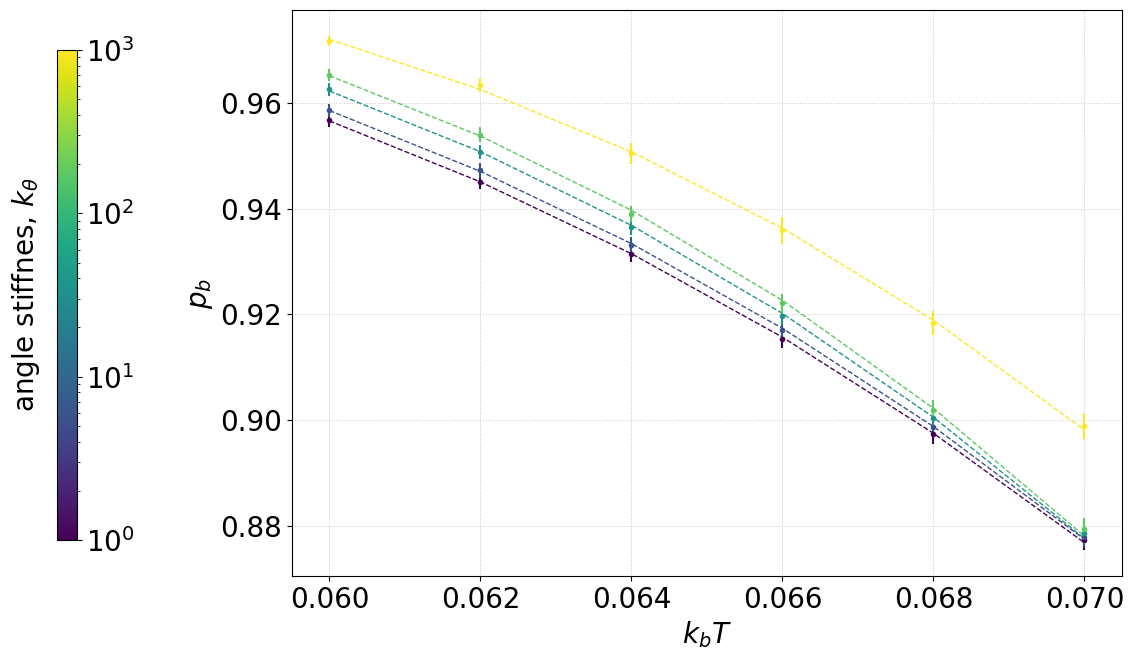

In [13]:
#create a figure
f, ax = plt.subplots(figsize=(10, 7))
matplotlib.rcParams['font.size'] = 20
plt.xlabel(r'$k_bT$')
plt.ylabel(r'$p_b$')
ax.grid(True, which='both', linestyle=':', linewidth=0.7, alpha=0.7)

# create a colorbar
colors = plt.cm.viridis(np.linspace(0, 1, 5))
norm = mcolors.LogNorm(vmin=1, vmax=1000)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
cbar_ax = f.add_axes([-0.1, 0.2, 0.02, 0.7]) 
cbar = f.colorbar(sm, cax=cbar_ax)
cbar.set_label(r'angle stiffnes, $k_\theta$', rotation=90, labelpad=-90)

#plot the data
kTs = [np.round(0.06+i*0.002,3) for i in range(6)]
x = np.array(kTs)
data = [pairs_k1, pairs_k2, pairs_k10, pairs_k100, pairs_k1000]
N = 10648
for i, pairs in enumerate(data):
    y = np.array([np.mean(pairs[kT][1]/(N*3)) for kT in kTs[:]])
    error = np.array([np.std(pairs[kT][1]/(N*3)) for kT in kTs[:]])
    ax.errorbar(x, y, yerr=error, fmt='.', label=r'$k_\theta=1$', color=colors[i])
    slope, intercept, r_value, p_value, std_err = stats.linregress(1/x, np.log(1-y))
    ax.plot(x, -np.exp(slope*(1/x)+intercept)+1, linestyle='--', color=colors[i], linewidth=1)

f.tight_layout()
plt.show()

2.6984367958124745e-09
1.66949387188034e-09
1.7853248967786534e-08
4.3143339890219554e-08
1.72906879652588e-07


/tmp/ipykernel_1661823/1078704430.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  f.tight_layout()


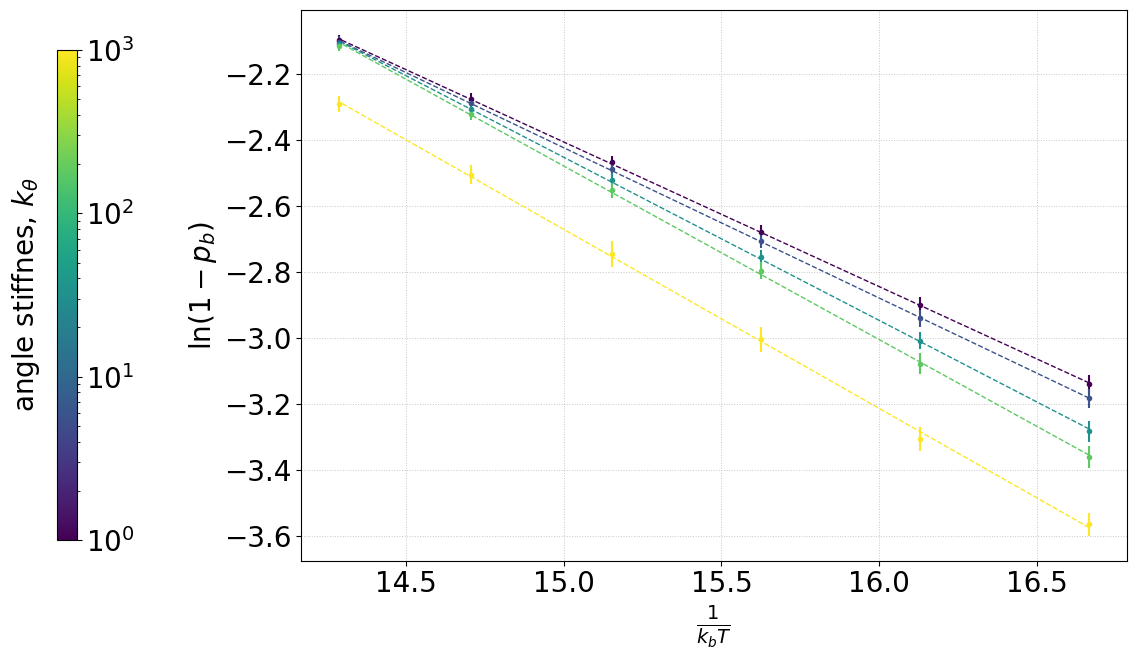

In [16]:
#create a figure
f, ax = plt.subplots(figsize=(10, 7))
plt.xlabel(r'$\frac{1}{k_bT}$')
plt.ylabel(r'$\ln(1-p_b)$')
ax.grid(True, which='both', linestyle=':', linewidth=0.7, alpha=0.7)

#add colorbar
cbar_ax = f.add_axes([-0.1, 0.2, 0.02, 0.7]) 
cbar = f.colorbar(sm, cax=cbar_ax)
cbar.set_label(r'angle stiffnes, $k_\theta$', rotation=90, labelpad=-90)

# plot data
N = 10648
kTs = [np.round(0.06+i*0.002,3) for i in range(6)]
x = 1/np.array(kTs)
data = [pairs_k1, pairs_k2, pairs_k10, pairs_k100, pairs_k1000]
slopes = []
errors = []
for i, pairs in enumerate(data):
    y = np.array([np.mean(np.log(1-(pairs[kT][1]/(N*3)))) for kT in kTs[:]])
    error = np.array([np.std(np.log(1-(pairs[kT][1]/(N*3)))) for kT in kTs[:]])
    ax.errorbar(x, y, yerr=error, fmt='.', label=r'$k_\theta=1$', color=colors[i])
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    print(p_value)
    slopes.append(slope)
    errors.append(std_err)
    ax.plot(x, slope * x + intercept, linestyle='--', color=colors[i], linewidth=1)

f.tight_layout()

<ErrorbarContainer object of 3 artists>

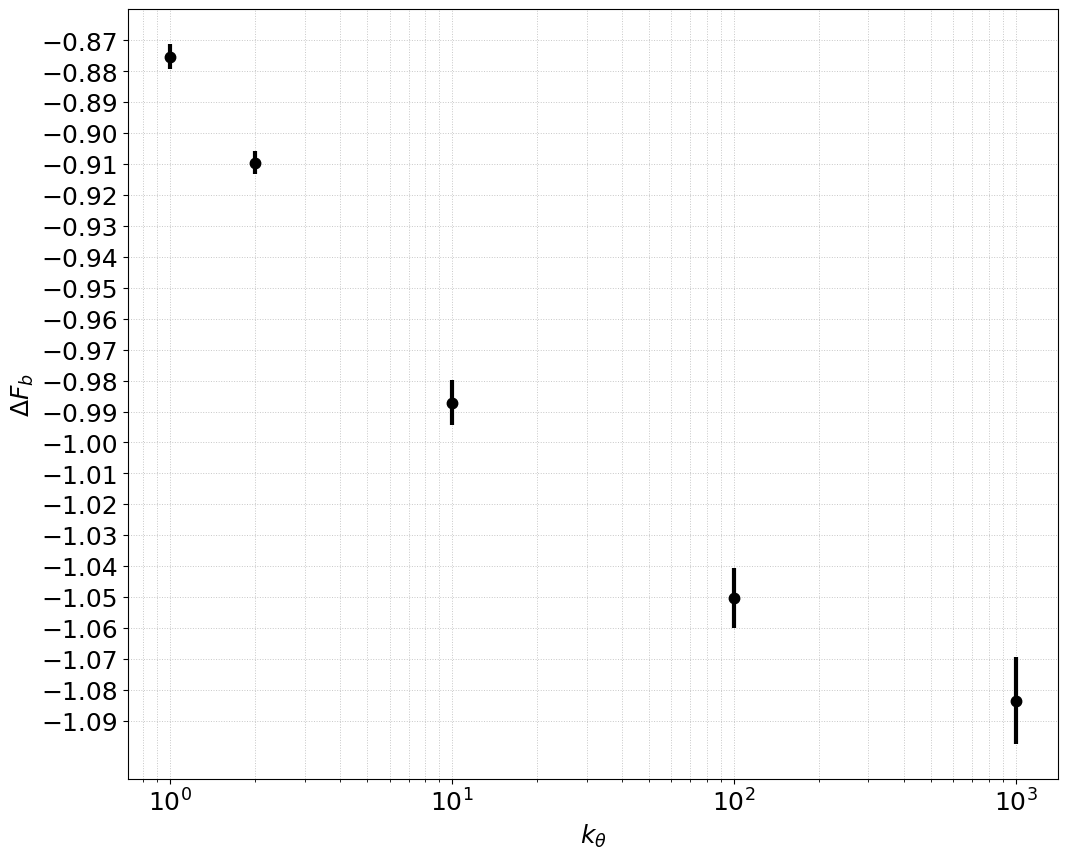

In [21]:
#create a figure
mpl.rcParams['font.size'] = 18
f, axs = plt.subplots(1, 1, figsize = (12,10))
plt.xlabel(r'$k_\theta$')
plt.ylabel(r'$\Delta F_b$')
plt.xscale('log')
plt.yticks([-0.87 - i*0.01 for i in range(23)])
plt.grid(True, which='both', linestyle=':', linewidth=0.7, alpha=0.7)

#plot the data
x = [1,2,10,100,1000]
y = np.array(slopes)
yerr = np.array(errors)
plt.errorbar(y=2*y, yerr=2*yerr, x=x, fmt='.', markersize=15, linewidth=3, color='k')

# Bonds distribution across particles

Here we check whether bonds form independentely. 
For that we compare actual number of particles with expected. The expected number of particles with $l$ bonds, $E_l$, was determined using binominal distribution:
\begin{equation}
E_l = N \times \binom{3}{l} \times p^l \times (1-p)^{3-l}.
\end{equation}
Then we use Kolmogorov-Smirnov test to compare means of observed and expected distributions.

In [23]:
# number of bonded patches
with open('/share/scratch1/alena.taskina01/md/hoomd4/3patches/rigid/kT0.07/pairs_8_5.pkl', 'rb') as file:
    pairs_70 = pickle.load(file)

In [24]:
# number of particles with specific number of bonds
with open('/share/scratch1/alena.taskina01/md/hoomd4/3patches/rigid/kT0.07/cores_pairs_8_5.pkl', 'rb') as file:
    cores_pairs_70 = pickle.load(file)

16.174424436757008 0.0010443273260196421


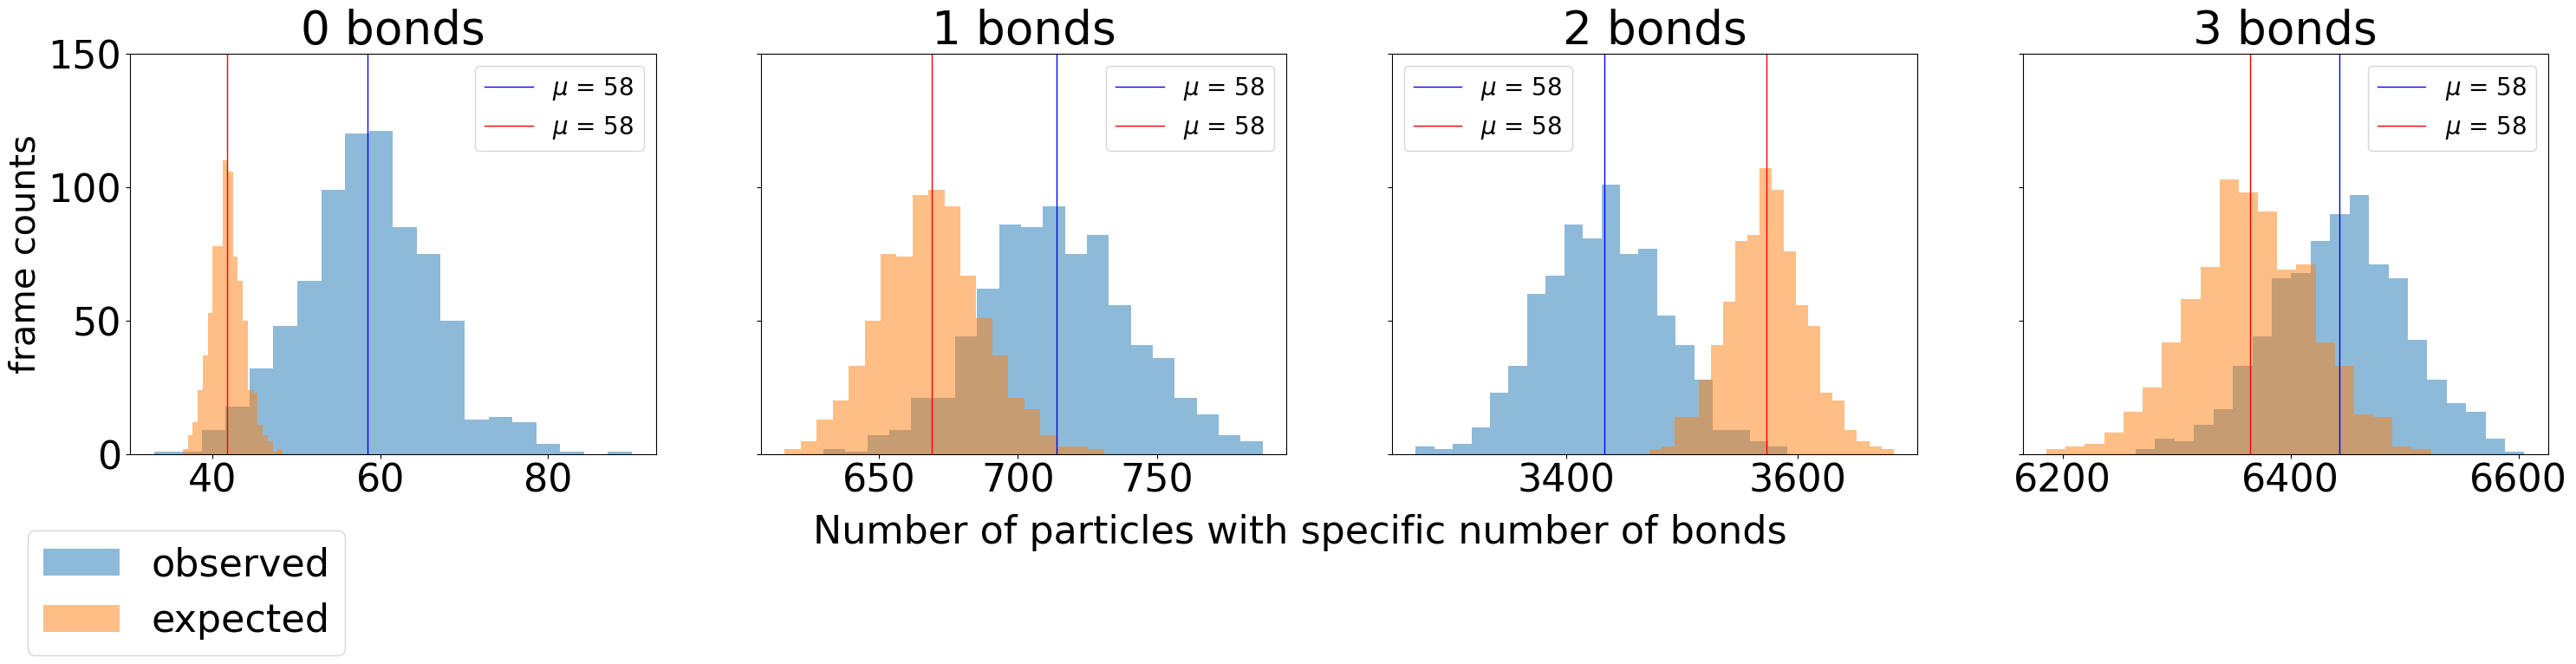

In [45]:
# create a figure
fig, axes = plt.subplots(1, 4, figsize=(36,6), sharex=False, sharey=True)
mpl.rcParams['font.size'] = 32
plt.ylim((0,150))
axes[0].set_ylabel('frame counts', fontsize=30)
fig.text(0.5, -0.04, 'Number of particles with specific number of bonds', ha='center', va='center') 

# filter out the frames where single patch bonds with more than one another patch
mask = (pairs_70[2]==0)
pairs_70_filtered = pairs_70[:,mask]
cores_pairs_70_filtered = cores_pairs_70[:,mask]

# calculate the number of bonded (p) and non-bonded (q) patches
N = Decimal(10648)
n_b = 3
p = [Decimal(int(i)) for i in pairs_70_filtered[1]]
q = [Decimal(n_b*N-i) for i in p]


def plot_distr(axes, data, N, p, q, l, n_p=3):
    '''
    data -- array of number of particles with specific number of bonds
    N -- number of particles
    p -- array of number of bonded patches
    q -- array of number of non-bonded patches
    l -- number of bonds
    n_p -- number of patches
    '''

    # calculate the expected distribution
    Ex = [float(math.comb(n_p, l) * (i**(l)*j**(n_b-l))/(n_p*N*n_p*N*n_p)) for i,j in zip(p,q)]
    # add vertical lines for mean values
    mu_obs, std = stats.norm.fit(data[l])
    axes[l].axvline(mu_obs, color='b', linestyle='-', linewidth=1, label=f'$\mu$ = {round(mu)}', alpha=1)
    mu_exp, std = stats.norm.fit(Ex)
    axes[l].axvline(mu_exp, color='r', linestyle='-', linewidth=1, label=f'$\mu$ = {round(mu)}', alpha=1)
    #add legend and title
    axes[l].legend(loc='best', fontsize=20)
    axes[l].set_title(str(l) + ' bonds')
    # plot histograms of observed and expected distributions
    if l==n_b:
        axes[l].hist(data[l], bins=20, alpha=0.5, label='observed')
        axes[l].hist(Ex, bins=20, alpha=0.5, label='expected')
    else: 
        axes[l].hist(data[l], bins=20, alpha=0.5)
        axes[l].hist(Ex, bins=20, alpha=0.5)
    return mu_obs, mu_exp

#plot the data
obs = {}
exp = {}
for i in range(4):
    obs[i], exp[i] = plot_distr(axes, cores_pairs_70_filtered, N, p, q, i)

# add legend
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles[-2:], labels[-2:], bbox_to_anchor=(0.2,0)) 

# Kolmogorov-Smirnov test 
chi2_stat, p_val = chisquare([float(i) for i in obs.values()], [float(i) for i in exp.values()])
print(chi2_stat, p_val)


There is a slight antipathy for particles with two bonds 

# Bonds distances

Exploring distances between centers of two bonded patches

In [46]:
def potential(r, n=2, m=1, sigma=0.24, eps = 9, shift_x = True):
    if shift_x:
        delta = ((n/m)*(sigma**(n-m)))**(1/(n-m))
    else:
        delta = 0
    return eps * (n/(n-m)) *((n/m)**(m/(n-m))) * ((sigma/(r+delta))**n - (sigma/(r+delta))**m)

In [67]:
def draw_hist(traj_name, N=13000):
    # get the distances from the simulation data
    traj = gsd.hoomd.open(traj_name)
    # get the bonds in the first timeframe
    bonds = analysis.Bonds(traj[0]).bonds
    # filter out the same pairs of bonds (i,j) and (j,i)
    bonds = bonds.filter(bonds.point_indices < bonds.query_point_indices)
    # get the distances for N bonds
    dist = bonds.distances[:N]

    #calculate histogram
    hist, bin_edges = np.histogram(dist, 50, range=(0,0.24))
    bin_centers = (bin_edges[1:] + bin_edges[:-1])/2

    # calculate median distance and standard deviation
    std = np.round(np.std(dist), 4)
    m_distance = np.median(dist)
    mu = np.round(m_distance, 3)
    
    return bin_centers, hist, m_distance, mu, std

for rigid model

/tmp/ipykernel_1661823/3578366557.py:6: RuntimeWarning: divide by zero encountered in divide
  return eps * (n/(n-m)) *((n/m)**(m/(n-m))) * ((sigma/(r+delta))**n - (sigma/(r+delta))**m)
/tmp/ipykernel_1661823/3578366557.py:6: RuntimeWarning: invalid value encountered in subtract
  return eps * (n/(n-m)) *((n/m)**(m/(n-m))) * ((sigma/(r+delta))**n - (sigma/(r+delta))**m)


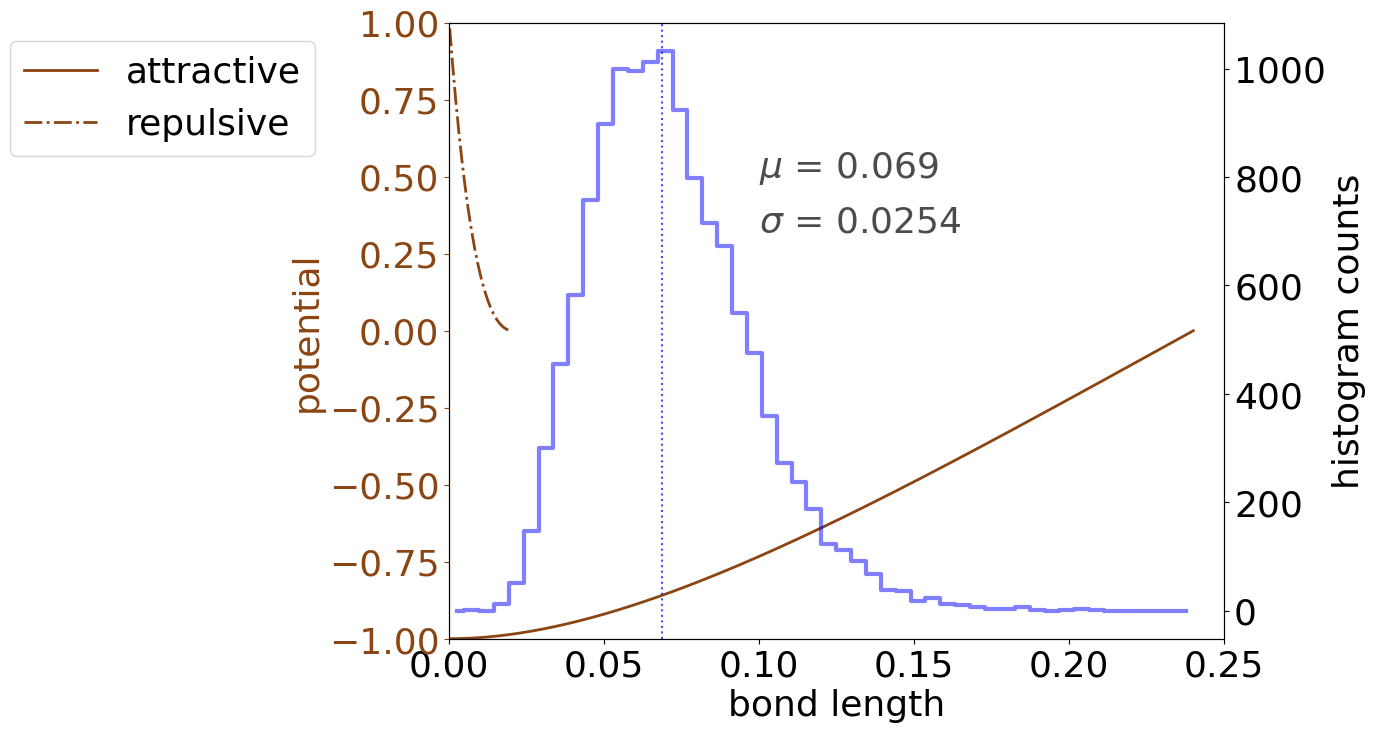

In [68]:
# create a figure
mpl.rcParams['font.size'] = 26
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
ax_right = ax.twinx()
ax.set_xlabel('bond length')
ax.set_ylabel('potential', color='saddlebrown')
ax.tick_params(axis='y', colors='saddlebrown')
ax_right.set_ylabel('histogram counts')

#plot the histogram
bin_centers, hist, m_distance, mu, std = draw_hist('/share/scratch1/alena.taskina01/md/hoomd4/3patches/rigid/kT0.06/msd_8_5.gsd')
ax_right.plot(bin_centers, hist, color='b', drawstyle='steps-mid', linewidth=3, alpha=0.5)
ax_right.axvline(m_distance, color='b', linestyle=':', alpha=0.7, label=f'$\mu$ = ' + str(mu))
plt.text(0.1, 800, f'$\mu$ = ' + str(mu), color='k', alpha=0.7)
plt.text(0.1, 700, f'$\sigma$ = ' + str(std), color='k', alpha=0.7)

# plot the potentials
rs = np.linspace(0,0.24,1000)
ax.plot(rs, potential(rs) - potential(0.24), color='saddlebrown', label = 'attractive', linewidth=2)
rs = np.linspace(0,50/49,1000)
ax.plot(rs-1, potential(rs, n=50, m=49, eps=1, sigma=1, shift_x=False)+1, color='saddlebrown', label='repulsive', linewidth=2, linestyle='-.')
ax.set_ylim(-1,1)
ax.set_xlim(0,0.25)
ax.legend(bbox_to_anchor=(-0.15,1))

for flexible model

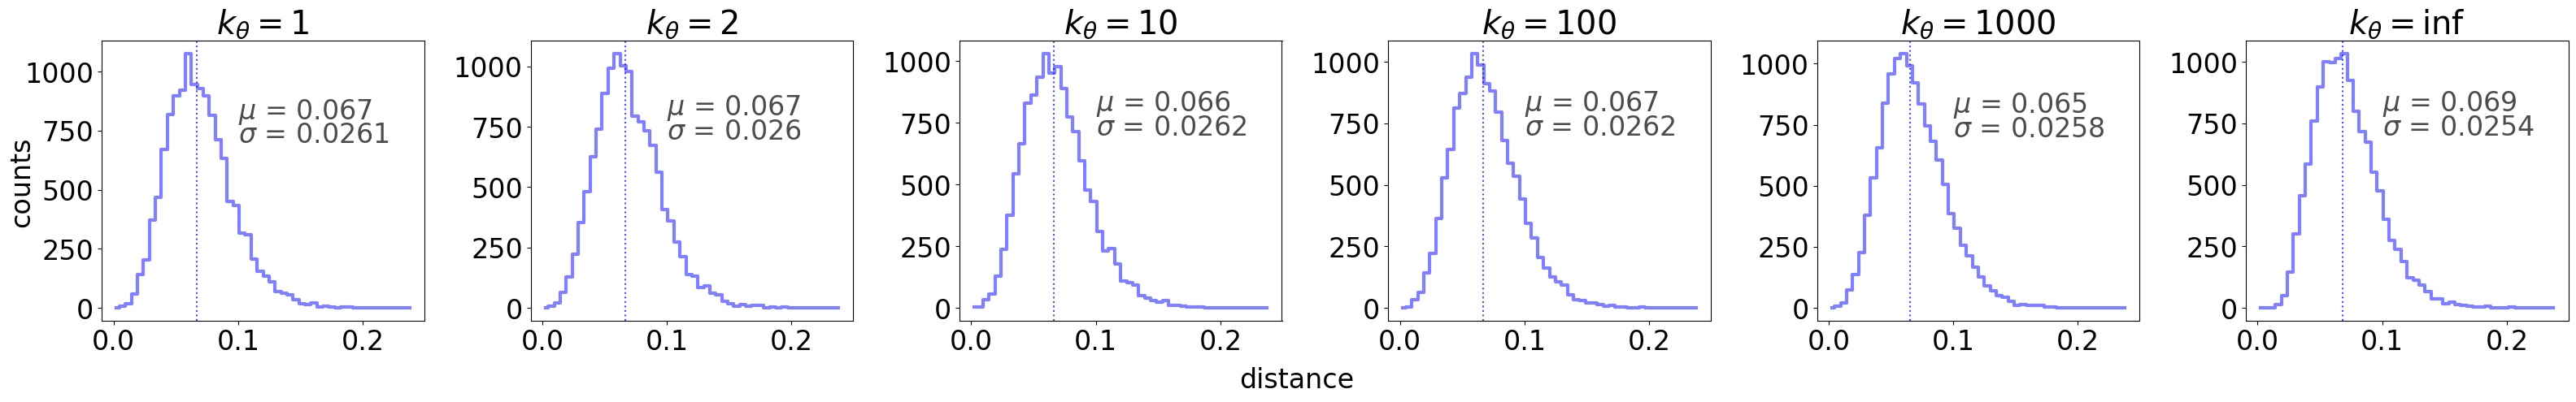

In [75]:
#create a figure
fig, axs = plt.subplots(1, 6, figsize=(32, 5))
mpl.rcParams['font.size'] = 24
fig.text(0.5, 0.01, 'distance', ha='center', va='center')
fig.text(0.01, 0.5, 'counts', ha='center', va='center', rotation='vertical')

# plot the histograms for flexible bonds
for i,k in enumerate([1,2,10,100,1000]):
    bin_centers, hist, m_distance, mu, std = draw_hist('/share/scratch1/alena.taskina01/md/hoomd4/3patches/angles/k' + str(k) + '/0.06/msd_8_5.gsd')
    axs[i].plot(bin_centers, hist, color='b', drawstyle='steps-mid', linewidth=3, alpha=0.5)
    axs[i].axvline(m_distance, color='b', linestyle=':', alpha=0.7, label=f'$\mu$ = ' + str(mu))
    axs[i].text(0.1, 800, f'$\mu$ = ' + str(mu), color='k', alpha=0.7)
    axs[i].text(0.1, 700, f'$\sigma$ = ' + str(std), color='k', alpha=0.7)
    axs[i].set_title(r'$k_{\theta}=$' + str(k)) 

# plot the histogram for rigid bonds
bin_centers, hist, m_distance, mu, std = draw_hist('/share/scratch1/alena.taskina01/md/hoomd4/3patches/rigid/kT0.06/msd_8_5.gsd')
axs[5].plot(bin_centers, hist, color='b', drawstyle='steps-mid', linewidth=3, alpha=0.5)
axs[5].axvline(m_distance, color='b', linestyle=':', alpha=0.7, label=f'$\mu$ = ' + str(mu))
axs[5].text(0.1, 800, f'$\mu$ = ' + str(mu), color='k', alpha=0.7)
axs[5].text(0.1, 700, f'$\sigma$ = ' + str(std), color='k', alpha=0.7)
axs[5].set_title(r'$k_{\theta}=$' + 'inf')

fig.tight_layout()

# Lifetimes of bonds

Let's first analyse how the number of bonds change from one timeframe to another (single timestep resolution)

Text(0.5, 1.0, '$k_bT = 0.07$')

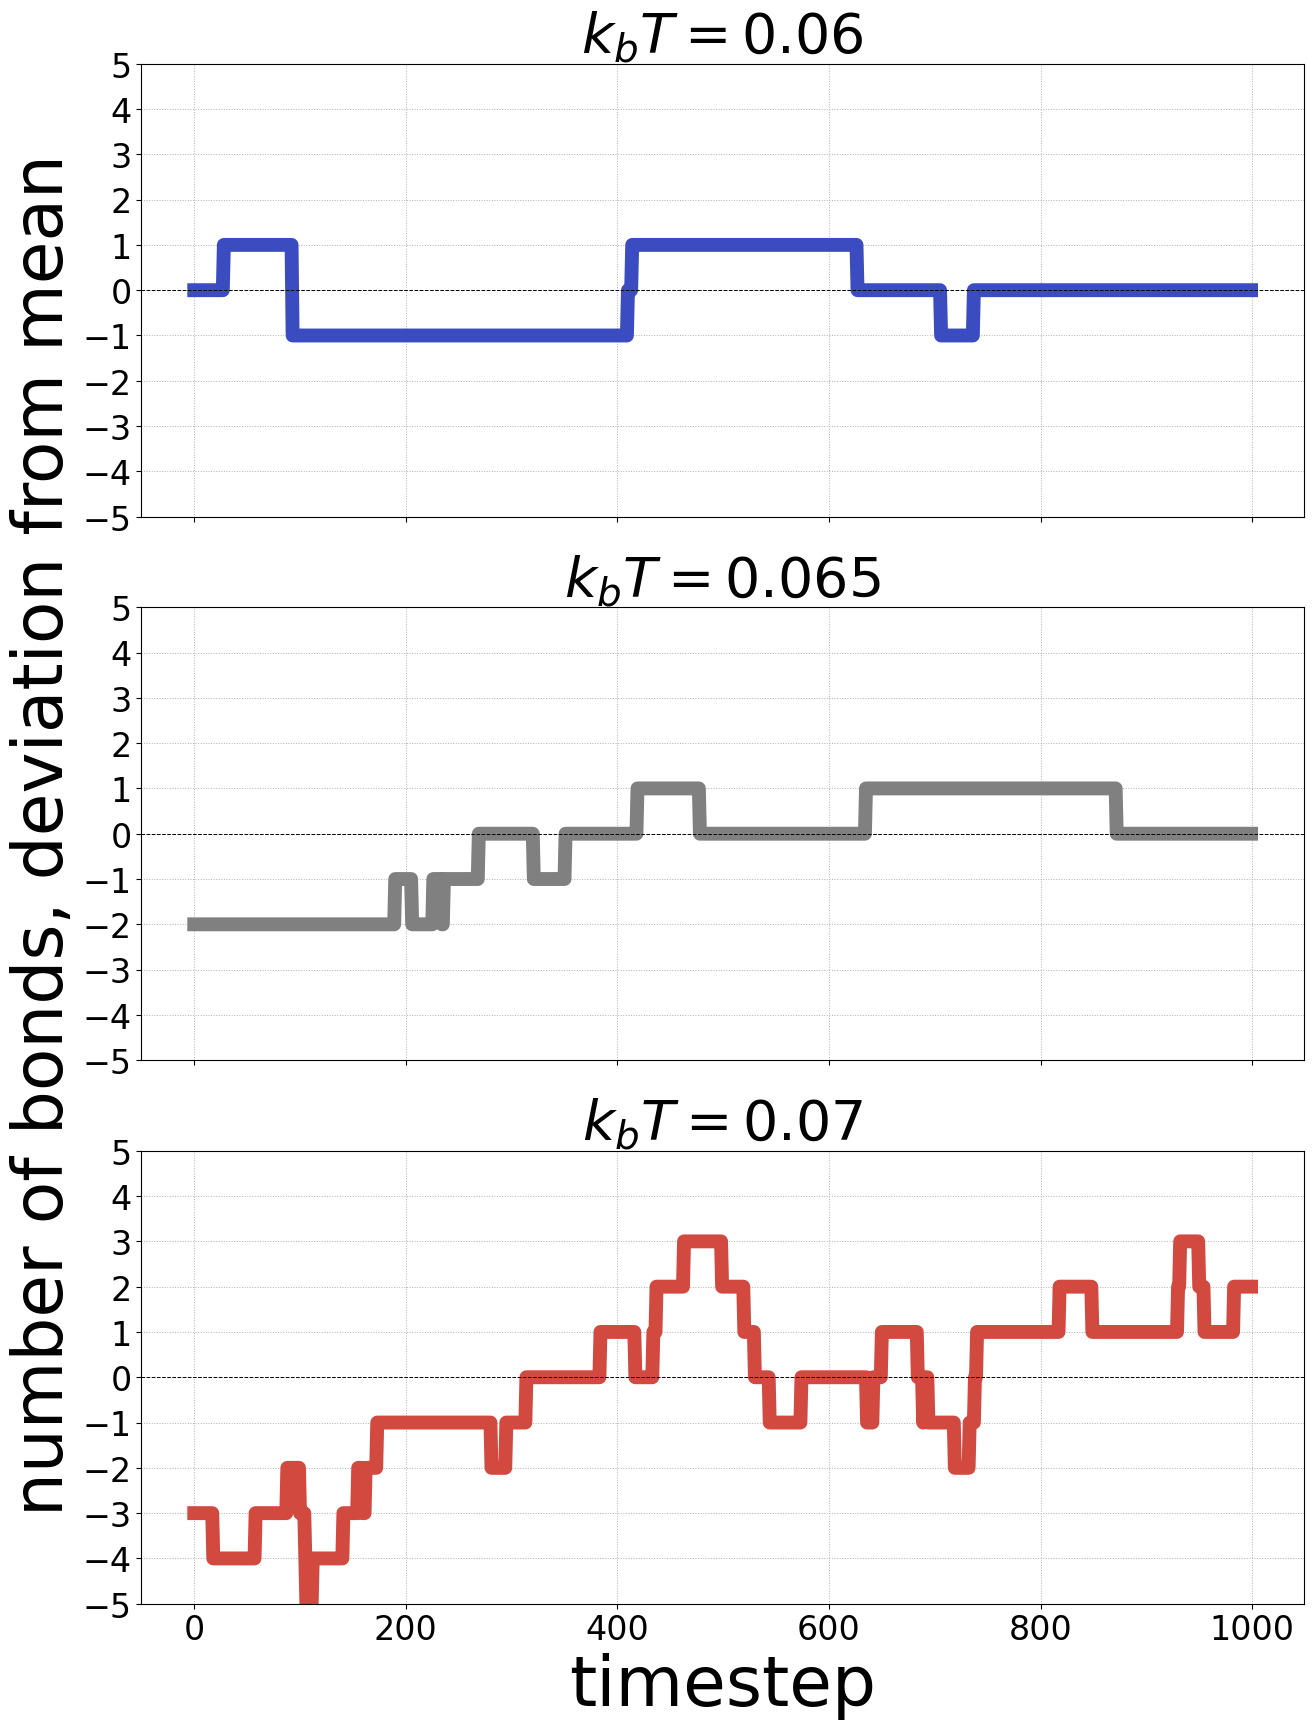

In [77]:
#create a figure
f, axs = plt.subplots(3,1, sharex=True, figsize = (15,20))
ticks = [-5,-4,-3,-2,-1,0,1,2,3,4,5]
mpl.rcParams['font.size'] = 30
plt.xlabel('timestep', fontsize=50)
axs[1].set_ylabel('number of bonds, deviation from mean', fontsize=50)
for ax in axs:
    ax.set_ylim((-5,5))
    ax.set_yticks(ticks)
    ax.grid(True, which='both', linestyle=':', linewidth=0.7, alpha=1)

colors = [matplotlib.cm.coolwarm(i) for i in np.linspace(0, 1, 13)]

# load the data
with open('/share/scratch1/alena.taskina01/md/hoomd4/3patches/rigid/kT0.06/pairs_3_0.pkl', 'rb') as file:
    pairs_60 = pickle.load(file)
with open('/share/scratch1/alena.taskina01/md/hoomd4/3patches/rigid/kT0.065/pairs_3_0.pkl', 'rb') as file:
    pairs_65 = pickle.load(file)
with open('/share/scratch1/alena.taskina01/md/hoomd4/3patches/rigid/kT0.07/pairs_3_0.pkl', 'rb') as file:
    pairs_70 = pickle.load(file)

#plot the data
axs[0].plot((pairs_60[1][:1000])/2-np.mean((pairs_60[1][:1000])/2)-0.07 , color=colors[0], linewidth=10)
axs[0].set_title(r'$k_bT = 0.06$', fontsize=40)
axs[0].axhline(0, color='black', linestyle='--', linewidth=0.7)
axs[1].plot((pairs_65[1])/2-np.mean((pairs_65[1][:1000])/2)-0.215, color='grey', linewidth=10)
axs[1].set_title(r'$k_bT = 0.065$', fontsize=40)
axs[1].axhline(0, color='black', linestyle='--', linewidth=0.7)
axs[2].plot((pairs_70[1])/2-np.mean((pairs_70[1][:1000])/2)-0.191, color=colors[-2], linewidth=10)
axs[2].axhline(0, color='black', linestyle='--', linewidth=0.7)
axs[2].set_title(r'$k_bT = 0.07$', fontsize=40)

extract data

In [12]:
# Define the file paths
file_paths = [
    '/share/scratch1/alena.taskina01/md/hoomd4/3patches/rigid/lifetimes_distr.pkl',
    '/share/scratch1/alena.taskina01/md/hoomd4/3patches/angles/k1/lifetimes_distr.pkl',
    '/share/scratch1/alena.taskina01/md/hoomd4/3patches/angles/k2/lifetimes_distr.pkl',
    '/share/scratch1/alena.taskina01/md/hoomd4/3patches/angles/k10/lifetimes_distr.pkl',
    '/share/scratch1/alena.taskina01/md/hoomd4/3patches/angles/k100/lifetimes_distr.pkl',
    '/share/scratch1/alena.taskina01/md/hoomd4/3patches/angles/k1000/lifetimes_distr.pkl'
]

# Define the variable names
variables = ['lifetimes', 'lifetimes_k1', 'lifetimes_k2', 'lifetimes_k10', 'lifetimes_k100', 'lifetimes_k1000']

# Use a loop to open and load the files
for file_path, variable in zip(file_paths, variables):
    with open(file_path, 'rb') as file:
        globals()[variable] = pickle.load(file)

for rigid model at different temperatures

### Stretched exponential dependence
The lifetime distribution $P(t)$ adheres to the Kohlraush-Williams-Watts stretched exponential form ($0<\beta<1$):
\begin{equation}
    P(t) = A \exp\left[-\left(\frac{t}{\tau'_b}\right)^\beta\right]
\end{equation}

In [13]:
def log_stretched_exp(t, A, B, c):
    return A - (B*t)**c

/tmp/ipykernel_1767497/977567596.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  f.tight_layout()


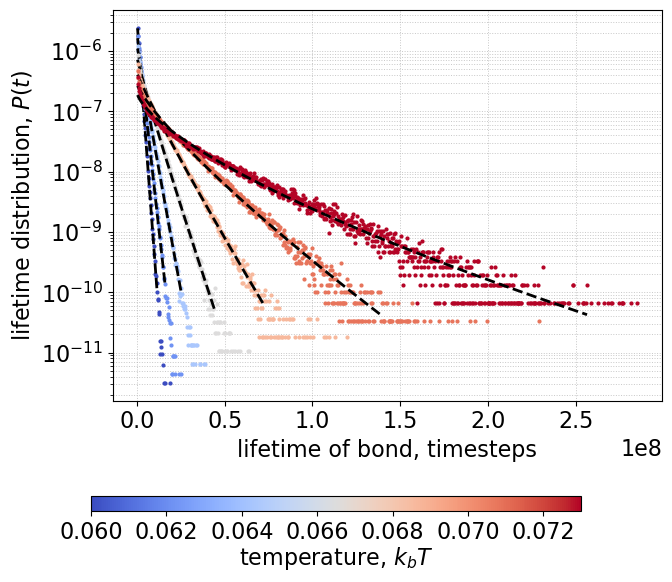

In [66]:
# create a figure
f, axs = plt.subplots(1, 1, figsize = (7,5))
axs.grid(True, which='both', linestyle=':', linewidth=0.7, alpha=0.7)
mpl.rcParams['font.size'] = 16
plt.yscale('log')
plt.xlabel('lifetime of bond, timesteps')
plt.ylabel('lifetime distribution, $P(t)$')

# add colorbar
colors = [matplotlib.cm.coolwarm(i) for i in np.linspace(0, 1, 13)]
norm = matplotlib.colors.Normalize(vmin=0.06, vmax=0.073)
sm = matplotlib.pyplot.cm.ScalarMappable(cmap="coolwarm", norm=norm)
sm.set_array([])
cbar_ax = f.add_axes([0.15, -0.05, 0.7, 0.03]) 
cbar = f.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label(r'temperature, $k_bT$', rotation=0, labelpad=1)

i = 0 #counter for the colors
bin_size=10**5
beta = []
tau = []
for kT, data in lifetimes.items():
        x = np.array(list(data.keys()))
        y = np.array(list(data.values()))
        # Calculate the mean and variance of x distribution
        mean = sum([x*y for x,y in zip(x,y)])/sum(y)
        variance = sum([y*(x-mean)**2 for x,y in zip(x,y)])/sum(y)
        tau.append((mean, np.sqrt(variance)))

        # Normalize the counts
        y = y / (sum(y)*bin_size)
        # Plot the data
        axs.plot(x, y, 'o', color=colors[i*2], markersize=2, alpha=1)     

        # Remove the values with low probability for fitting
        x = x[y>=10**(-10)]
        y = y[y>=10**(-10)]

        # Fit the data
        [A, B, c], cov = curve_fit(log_stretched_exp, x, np.log(y))
        beta.append((c, np.sqrt(np.diag(cov)[2])))
        # Plot the fit
        axs.plot(x, np.exp(log_stretched_exp(x, A, B, c)), linestyle='--', color='k', linewidth=2, alpha=1)

        i +=1

f.tight_layout()

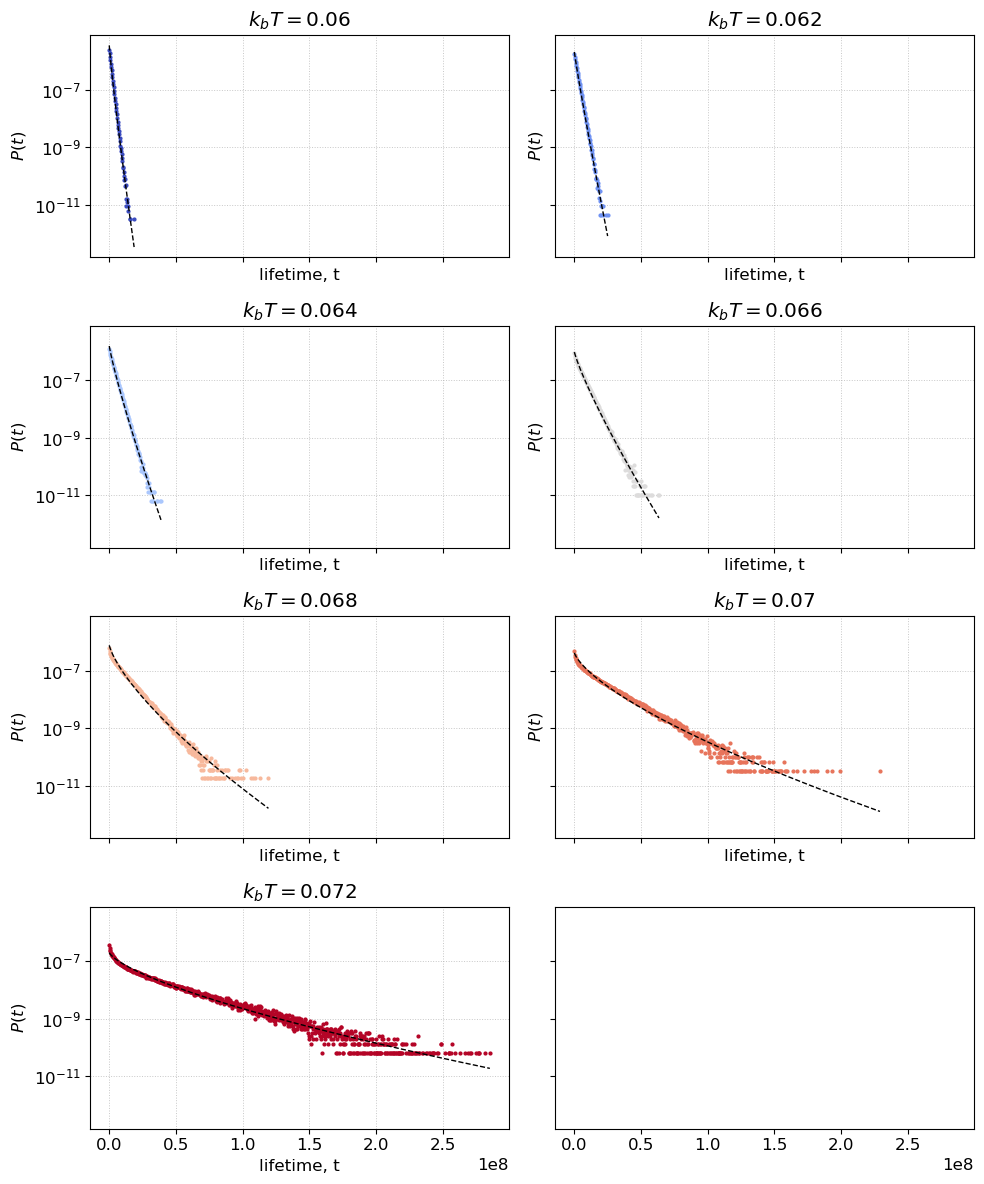

In [42]:
#create a figure
mpl.rcParams['font.size'] = 12
f, axs = plt.subplots(4, 2, figsize = (10,12), sharex=True, sharey=True)
axs_list = axs.flatten()

# plot the data
i = 0
for kT, data in lifetimes.items():
        x = np.array(list(data.keys()))
        y = np.array(list(data.values()))
        # Normalize the counts
        y = y / (sum(y)*bin_size)
        # Plot the data
        axs_list[i].plot(x, y, 'o', color=colors[i*2], markersize=2, alpha=1)
        # Fit the data
        [A, B, c], cov = curve_fit(log_stretched_exp, x, np.log(y))
        # Plot the fit
        axs_list[i].plot(x, np.exp(log_stretched_exp(x, A, B, c)), linestyle='--', color='k', linewidth=1, alpha=1)

        axs_list[i].grid(True, which='major', linestyle=':', linewidth=0.7, alpha=0.7)
        axs_list[i].set_yscale('log')
        axs_list[i].set_xlabel('lifetime, t')
        axs_list[i].set_ylabel('$P(t)$')
        axs_list[i].set_title(r'$k_bT = $' + str(np.round(0.06+i*0.002, 3)))
        i +=1

f.tight_layout()

### Arrhenius law
Relationship of mean bonds lifetime and reverse temperature follows the Arrhenius law with an activation energy $E_a$ of $1.07 \pm 0.01$ :
\begin{equation}
\tau_b = \tau_0 \exp\left(\frac{E_a}{k_bT}\right).
\end{equation}

Slope: 1.0690634472684295, Intercept: -0.853853002424195
Correlation Coefficient: 0.9995607235577078
P-value: 7.765982628035389e-09 (Statistical significance)
Standard Error: 0.014175733865622668


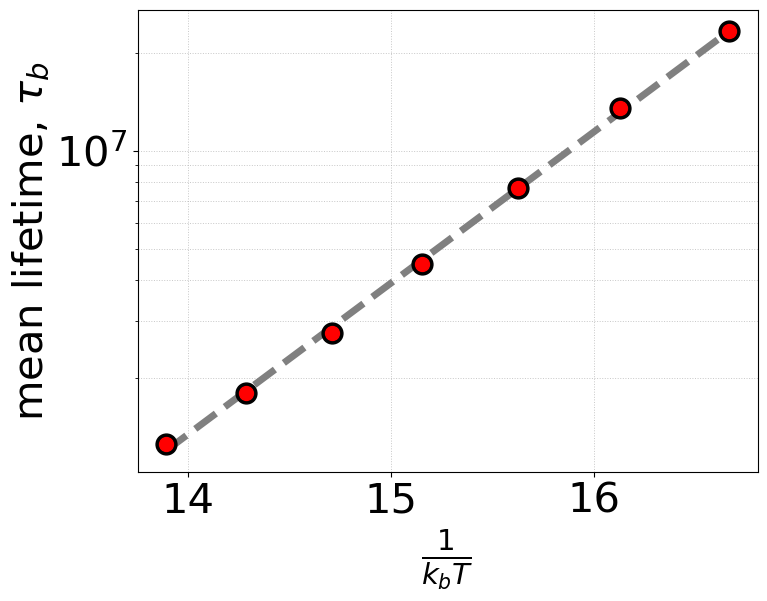

In [67]:
matplotlib.rcParams['font.size'] = 30
f, axs = plt.subplots(1, 1, figsize = (8,6))
axs.grid(True, which='both', linestyle=':', linewidth=0.7, alpha=0.7)

x = 1/np.array(list(lifetimes.keys()))
y = np.array([i[0] for i in tau])

slope, intercept, r_value, p_value, std_err = stats.linregress(x, np.log(y))
# Print the statistical significance
print(f"Slope: {slope}, Intercept: {intercept}")
print(f"Correlation Coefficient: {r_value}")
print(f"P-value: {p_value} (Statistical significance)")
print(f"Standard Error: {std_err}")
# Plot the linear fit
plt.plot(x, np.exp(slope * x + intercept), linestyle='--', color='grey', linewidth=5)

plt.plot(x, y, 'o', label=r'$k_\theta=inf$', color='k', markersize=15)
plt.plot(x, y, 'o', label=r'$k_\theta=inf$', color='r', markersize=10)
plt.xlabel(r'$\frac{1}{k_bT}$')
plt.ylabel(r'mean lifetime, $\tau_b $')

plt.yscale('log')

Text(0, 0.5, 'streching exponent, $\\beta$')

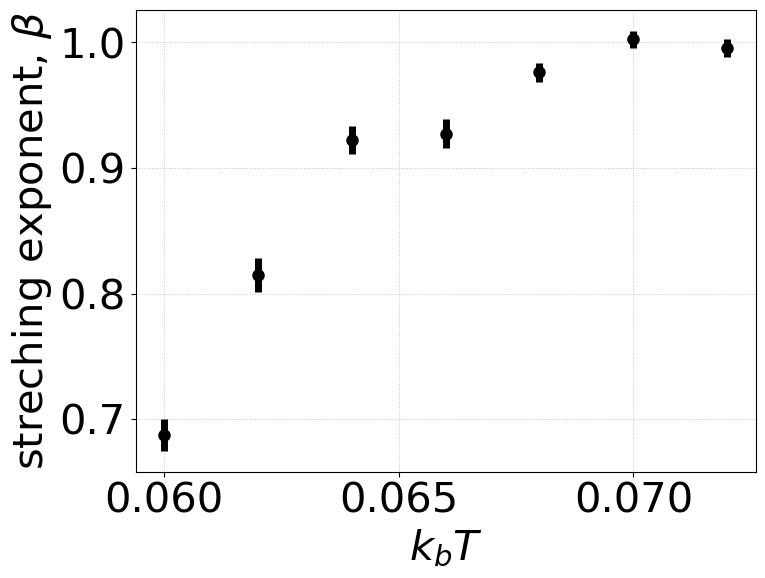

In [55]:
# create a figure
mpl.rcParams['font.size'] = 30
f, axs = plt.subplots(1, 1, figsize = (8,6))
axs.grid(True, which='both', linestyle=':', linewidth=0.7, alpha=0.7)
plt.xlabel(r'$k_bT$')
plt.ylabel(r'streching exponent, $\beta$')

# plot the data
x = np.array(list(lifetimes.keys()))
y = [b[0] for b in beta]
yerr = [b[1] for b in beta]
plt.errorbar(y=y, yerr=yerr, x=x, fmt='.', markersize=16, linewidth=5, color='k')

for flexible model

/tmp/ipykernel_1767497/1901091930.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  f.tight_layout()


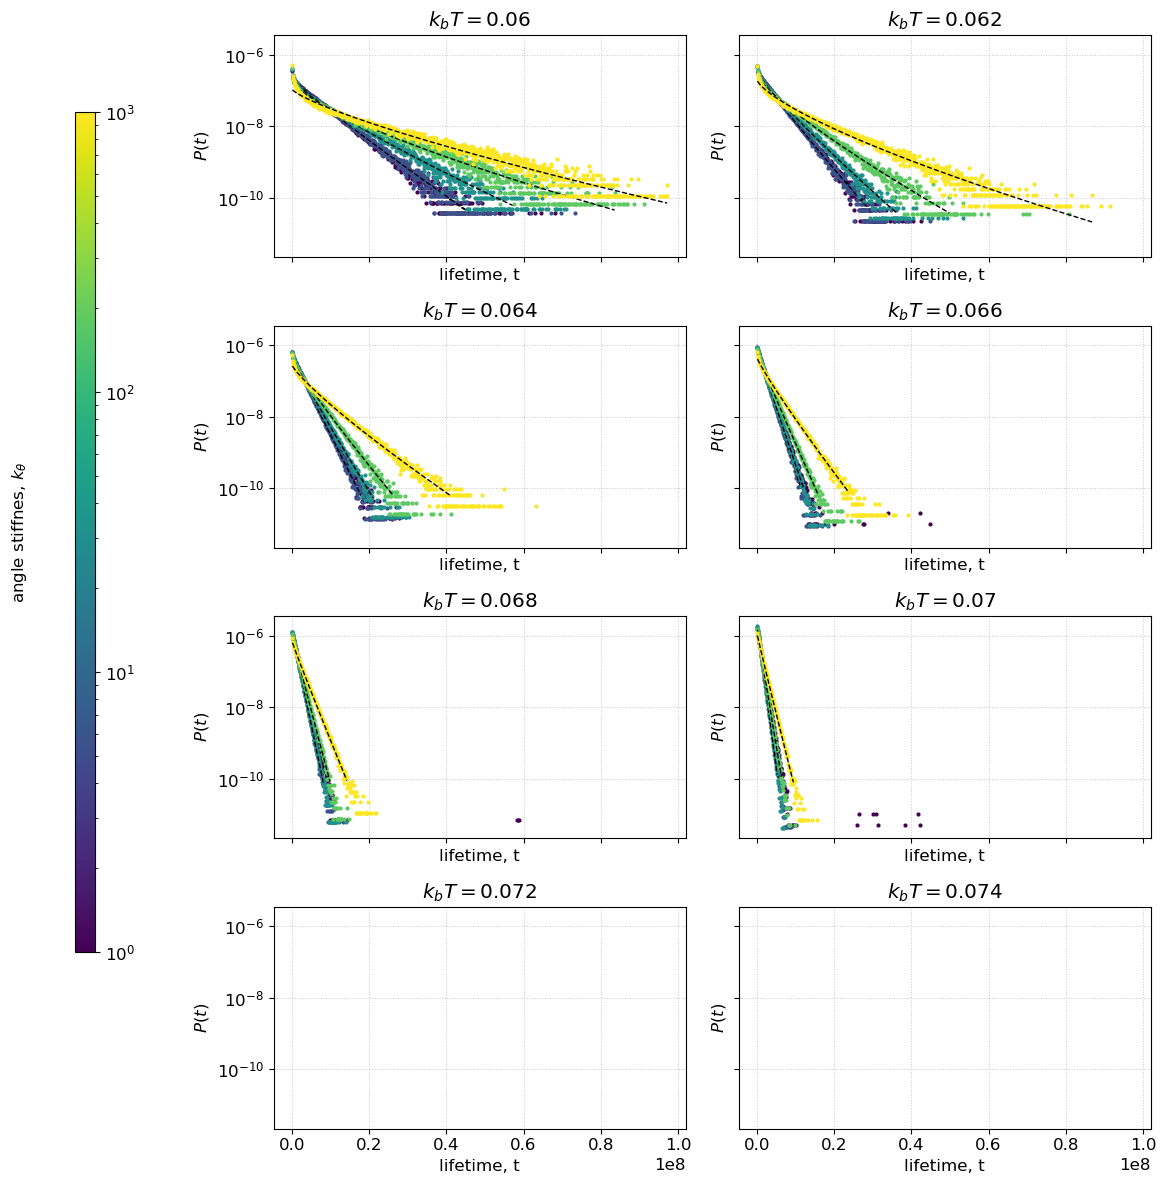

In [82]:
#create a figure
matplotlib.rcParams['font.size'] = 12
f, axs = plt.subplots(4, 2, figsize = (10,12), sharex=True, sharey=True)
axs_list = axs.flatten()
for i, axs in enumerate(axs_list):
        axs.grid(True, which='major', linestyle=':', linewidth=0.7, alpha=0.7)
        axs.set_yscale('log')
        axs.set_xlabel('lifetime, t')
        axs.set_ylabel('$P(t)$')
        axs.set_title(r'$k_bT = $' + str(np.round(0.06+i*0.002, 3)))

colors = plt.cm.viridis(np.linspace(0, 1, 5))
norm = mcolors.LogNorm(vmin=1, vmax=1000)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
cbar_ax = f.add_axes([-0.1, 0.2, 0.02, 0.7]) 
cbar = f.colorbar(sm, cax=cbar_ax)
cbar.set_label(r'angle stiffnes, $k_\theta$', rotation=90, labelpad=-90)

dataset = [lifetimes_k1, lifetimes_k2, lifetimes_k10, lifetimes_k100, lifetimes_k1000]
k_theta = [1,2,10,100,1000]
bin_size=10**5
beta_flex = {}
tau_flex = {}
for j, l in enumerate(dataset):
        i = 0 #counter for the kT
        beta_flex[k_theta[j]] = []
        tau_flex[k_theta[j]] = []
        for kT, data in l.items():
                x = np.array(list(data.keys()))
                y = np.array(list(data.values()))
                # Calculate the mean and variance of x distribution
                mean = sum([x*y for x,y in zip(x,y)])/sum(y)
                variance = sum([y*(x-mean)**2 for x,y in zip(x,y)])/sum(y)
                tau_flex[k_theta[j]].append((mean, np.sqrt(variance)))

                # Normalize the counts
                y = y / (sum(y)*bin_size)
                # Plot the data
                axs_list[i].plot(x, y, 'o', color=colors[j], markersize=2, alpha=1)     

                # Remove the values with low probability for fitting
                x = x[y>=10**(-10)]
                y = y[y>=10**(-10)]

                # Fit the data
                [A, B, c], cov = curve_fit(log_stretched_exp, x, np.log(y))
                beta_flex[k_theta[j]].append((c, np.sqrt(np.diag(cov)[2])))
                # Plot the fit
                axs_list[i].plot(x, np.exp(log_stretched_exp(x, A, B, c)), linestyle='--', color='k', linewidth=1, alpha=1)

                i +=1

f.tight_layout()

2.2369842332146266e-08
2.394232752024684e-08
1.2536968699653456e-08
4.850300122915613e-08
1.059891064632212e-05
7.765982628035389e-09


/tmp/ipykernel_1767497/960821760.py:40: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  f.tight_layout()


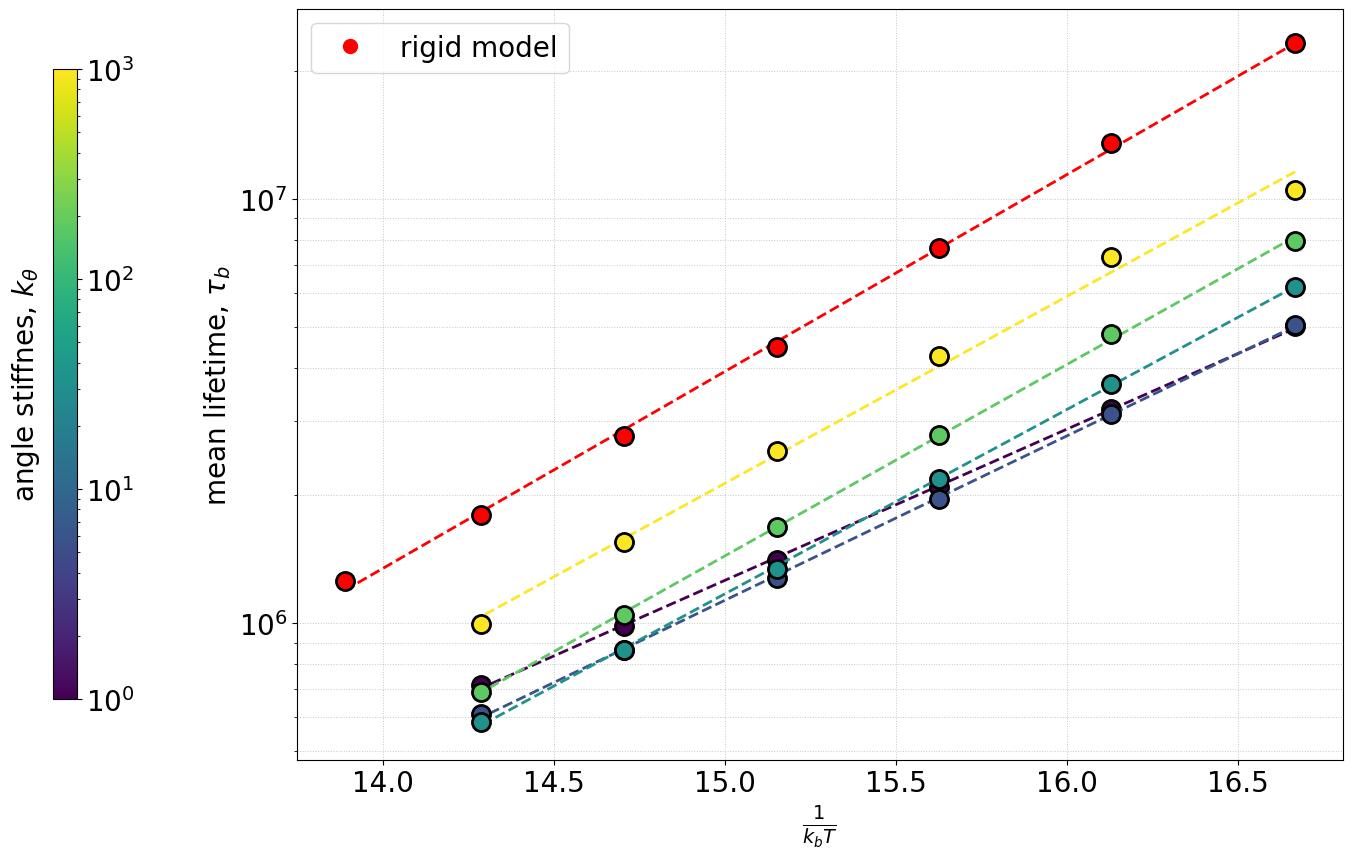

In [88]:
mpl.rcParams['font.size'] = 20
f, axs = plt.subplots(1, 1, figsize = (12,9))
axs.grid(True, which='both', linestyle=':', linewidth=0.7, alpha=0.7)
plt.yscale('log')
axs.set_xlabel(r'$\frac{1}{k_bT}$')
axs.set_ylabel(r'mean lifetime, $\tau_b $')

colors = plt.cm.viridis(np.linspace(0, 1, 5))
norm = mcolors.LogNorm(vmin=1, vmax=1000)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
cbar_ax = f.add_axes([-0.1, 0.2, 0.02, 0.7]) 
cbar = f.colorbar(sm, cax=cbar_ax)
cbar.set_label(r'angle stiffnes, $k_\theta$', rotation=90, labelpad=-90)

slopes = []
errors = []

x = 1/np.sort(np.array(list(lifetimes_k1.keys())))
for i, l in enumerate(tau_flex.values()):
    y = [d[0] for d in l]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, np.log(y))
    slopes.append(slope)
    errors.append(std_err)
    print(p_value)
    axs.plot(x, np.exp(slope * x + intercept), linestyle='--', color=colors[i], linewidth=2)
    axs.plot(x, y, 'o', color='k', markersize=14)
    axs.plot(x, y, 'o', color=colors[i], markersize=10)

x = 1/np.array(list(lifetimes.keys()))
y = [d[0] for d in tau]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, np.log(y))
print(p_value)
slopes.append(slope)
errors.append(std_err)
axs.plot(x, np.exp(slope * x + intercept), linestyle='--', color='r', linewidth=2)
axs.plot(x, y, 'o', color='k', markersize=14)
axs.plot(x, y, 'o', color='r', markersize=10, label='rigid model')

axs.legend()
f.tight_layout()

/tmp/ipykernel_1767497/131753963.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  f.tight_layout()


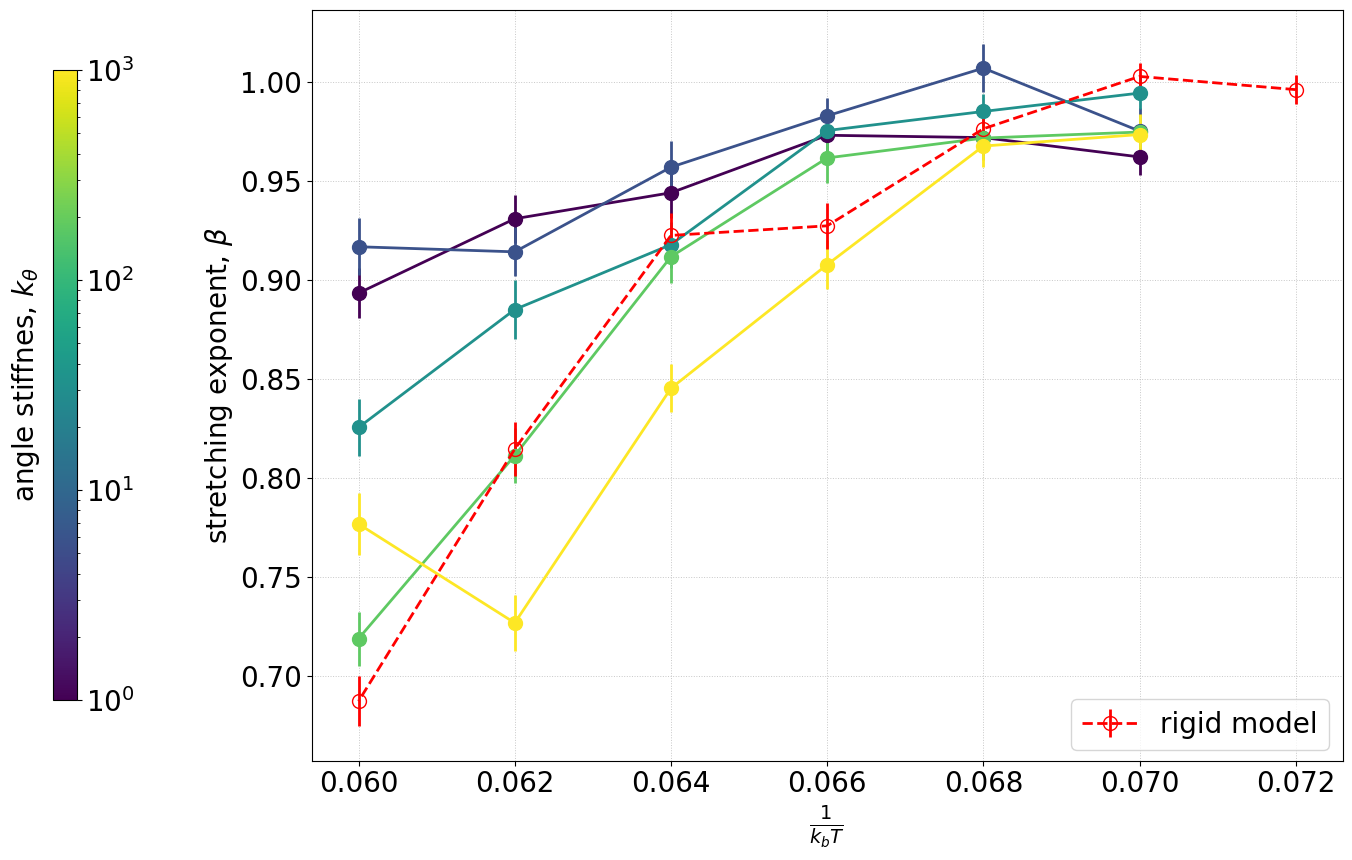

In [89]:
matplotlib.rcParams['font.size'] = 20
f, axs = plt.subplots(1, 1, figsize = (12,9))
axs.grid(True, which='both', linestyle=':', linewidth=0.7, alpha=0.7)
plt.xlabel(r'$\frac{1}{k_bT}$')
plt.ylabel(r'stretching exponent, $\beta $')

colors = plt.cm.viridis(np.linspace(0, 1, 5))
norm = mcolors.LogNorm(vmin=1, vmax=1000)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
cbar_ax = f.add_axes([-0.1, 0.2, 0.02, 0.7]) 
cbar = f.colorbar(sm, cax=cbar_ax)
cbar.set_label(r'angle stiffnes, $k_\theta$', rotation=90, labelpad=-90)

x = np.array(list(lifetimes_k1.keys()))
for i, l in enumerate(beta_flex.values()):
    y = [d[0] for d in l]
    yerr = [d[1] for d in l]
    axs.errorbar(y=y, yerr=yerr, x=x, fmt='.-', markersize=20, linewidth=2, color=colors[i])

x = np.array(list(lifetimes.keys()))
y = [d[0] for d in beta]
yerr = [d[1] for d in beta]
axs.errorbar(y=y, yerr=yerr, x=x, fmt='.--', mfc='none', mec='r', markersize=20, linewidth=2, color='r', label='rigid model')

axs.legend(bbox_to_anchor=(1,0.1))
f.tight_layout()

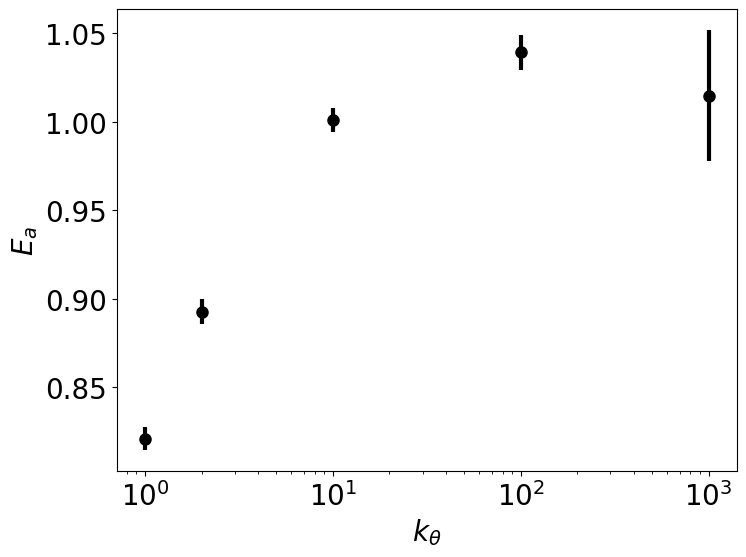

In [93]:
matplotlib.rcParams['font.size'] = 20
f, axs = plt.subplots(1, 1, figsize = (8,6))
plt.xlabel(r'$k_{\theta}$')
plt.ylabel(r'$E_a$')
plt.xscale('log')
#plt.grid(True, which='both', linestyle=':', linewidth=0.7, alpha=0.7)

x = [1,2,10,100, 1000]
y = slopes[:-1]
yerr = errors[:-1]
plt.errorbar(y=y, yerr=yerr, x=x, fmt='.', markersize=16, linewidth=3, color='k')

plt.savefig('/home/alena.taskina01/Pictures/Ea_vs_k_theta.svg')